In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

In [2]:
# Print a list of built-in datasets
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df = sb.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df = sb.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


These built in types are great for playing with, making predictions, etc.
You can find many exmplaes using these datasets.
Titanic is like the hello world of ML

Why is this in seaborn?
These are used for all seaborn tutorials. this requires network connection.

In [ ]:
# Saving to file:
df.to_csv('output_file.csv')

# Diamond prediction model

The problem:
We have diamonds data, we want to build a model for predicting the price.

We have the 4C of diamonds - carat, cut, color, clarity and some other features (depth?, table?, x?, y?, z?)

Predict the price
We don't understand exactly what are the depth, table, x, y, z yet. in a real world problem we would dive into that. but here we can try to learn from the data.

In [5]:
df = sb.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
'''
We have 53940 records, 3.0MB 
Checklist:
1. Missing data? - No missing data
  1.1. But what about future data? what if they will have missing data? 
       At the moment, we won't deal with this 
       (do nothing - alert someone that will handle it or delete them)
2. describe data
continue below...
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
df.describe()
'''
Now we need to look at the data
carat - large std (compared with mean), very large std. 75% is 1.04, max is 5 - 
        some abnormal results.
depth - very small std, mean - since std is small, 
        then replacing missing with avg is good
        try sb.displot(df.depth) and see that the mean value is the majority
price - mean and std are almost the same. so avg is NOT very predictive of the price
        see the 25% and 50%, 75% of price
        sb.displot(df.price)
        if price is normally distributed, it will be easily predictable 
'''

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


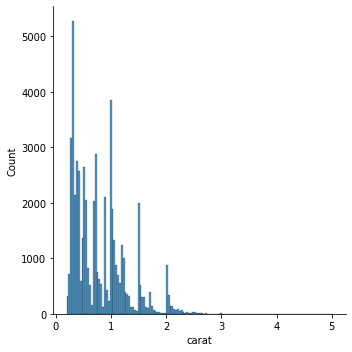

In [22]:
sb.displot(df.carat)

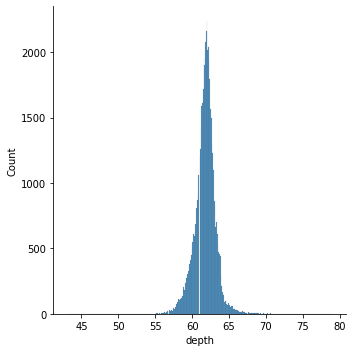

In [8]:
# depth - very small std, mean - since std is small, 
# then replacing missing with avg is good
# try sb.displot(df.depth) and see that the mean value is the majority
sb.displot(df.depth)

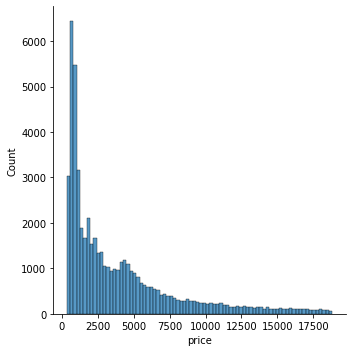

In [9]:
# Price is not normally distributed
sb.displot(df.price)

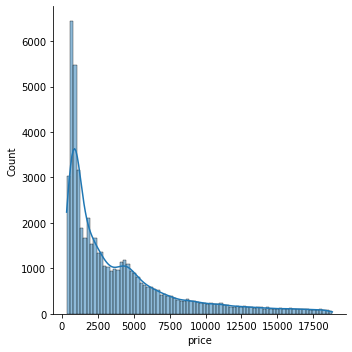

In [10]:
# Price is not normally distributed, with graph
# This usually shows that we need to split this problem into sub-problems
sb.displot(df.price, kde=True)

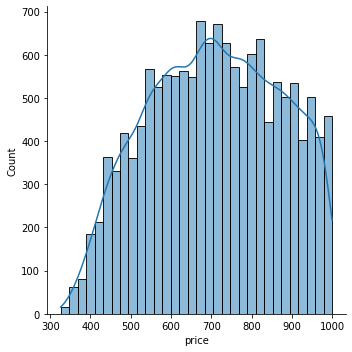

In [15]:
# Let's take only prices below 1000. - 14k records. 
# We can then plot it
# We get a more normal distribution
# But price is our target, we need to look in other places

sb.displot(df.query('price < 1000').price, kde=True)

We can solve the problem for carat < 0.5, > 0.5 AND < 1, > 1
And then find the prices according to carat


In [18]:
# Let's try looking at carat:
df1 = df.query('carat < 0.5')
df1.info()
# We get 17k diamonds below 0.5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17674 entries, 0 to 53639
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    17674 non-null  float64 
 1   cut      17674 non-null  category
 2   color    17674 non-null  category
 3   clarity  17674 non-null  category
 4   depth    17674 non-null  float64 
 5   table    17674 non-null  float64 
 6   price    17674 non-null  int64   
 7   x        17674 non-null  float64 
 8   y        17674 non-null  float64 
 9   z        17674 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 1.1 MB


In [19]:
df1.describe()

,carat,depth,table,price,x,y,z
count,17674.000000,17674.000000,17674.000000,17674.000000,17674.000000,17674.000000,17674.000000
mean,0.344492,61.695496,56.950045,792.403248,4.495727,4.505229,2.776045
std,0.053888,1.137483,2.050325,245.176457,0.239135,0.237021,0.147794
min,0.200000,51.000000,44.000000,326.000000,3.730000,3.680000,2.060000
25%,0.310000,61.100000,55.000000,608.000000,4.330000,4.340000,2.680000
50%,0.330000,61.800000,57.000000,765.000000,4.450000,4.460000,2.750000
75%,0.400000,62.400000,58.000000,943.000000,4.700000,4.710000,2.900000
max,0.490000,68.600000,68.000000,2677.000000,6.650000,6.020000,4.440000


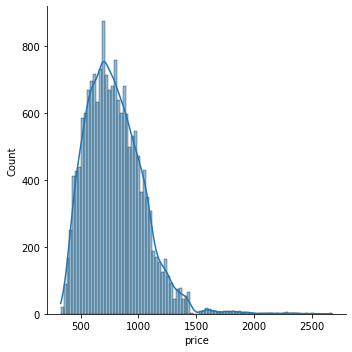

In [20]:
# After 1400 there are a very small trail
sb.displot(df1.price, kde=True)

In [25]:
# 154 records / 17k which are outliers - price above 1500
# We can try looking at specific records
df2 = df1.query("price > 1500")
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
44033,0.42,Ideal,D,VVS1,61.8,55.0,1547,4.83,4.85,2.99
44034,0.42,Ideal,D,VVS1,61.6,56.0,1547,4.79,4.82,2.96
44035,0.42,Very Good,D,VVS1,62.8,56.0,1547,4.76,4.80,3.00
44036,0.42,Ideal,D,VVS1,61.8,56.0,1547,4.79,4.82,2.97
44044,0.45,Ideal,G,IF,61.7,55.0,1548,4.93,4.96,3.05
...,...,...,...,...,...,...,...,...,...,...
51476,0.47,Ideal,D,VVS1,61.9,54.0,2378,4.98,5.00,3.09
52105,0.47,Ideal,D,VVS1,62.1,55.0,2460,4.98,5.01,3.10
52106,0.47,Ideal,D,VVS1,62.0,54.0,2460,4.99,5.01,3.10
52377,0.44,Ideal,G,IF,61.6,55.0,2506,4.90,4.93,3.03


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


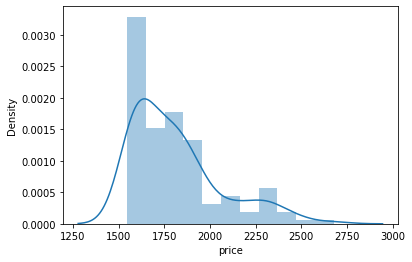

In [26]:
# But out of 17k diamonds, we can prep the 154 records by removing them
# We can try to learn what characterize them, but here we will remove them. 

sb.distplot(df2.price)



In [ ]:
# We can compare the pair plot with the original data
sb.pairplot(df2)

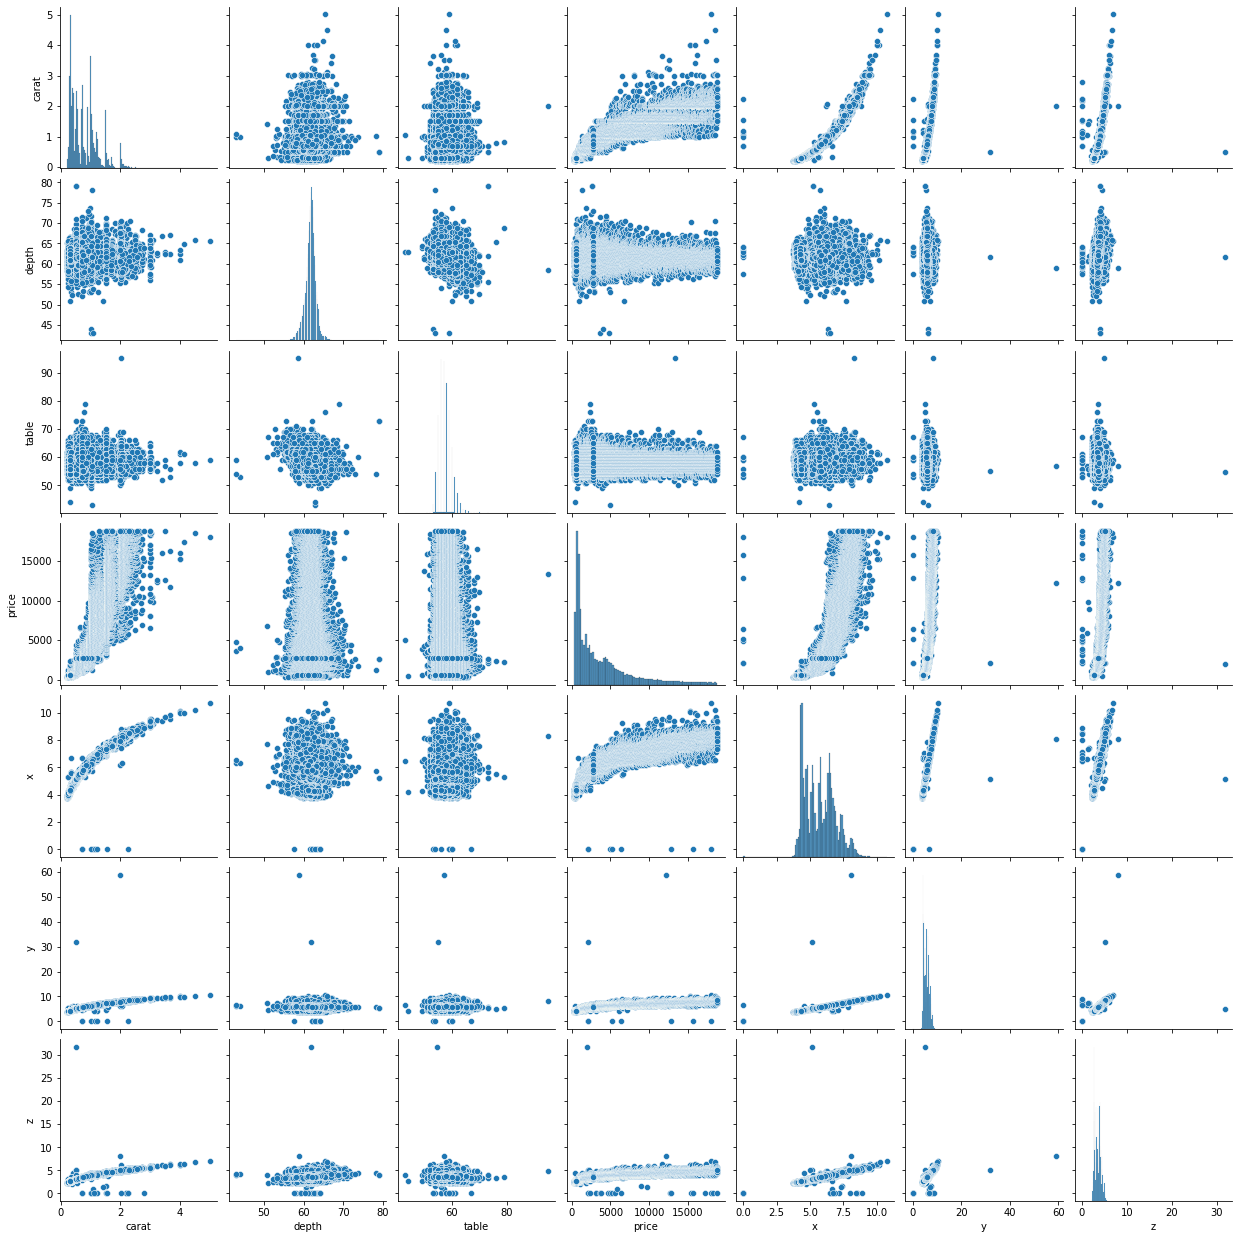

In [28]:
sb.pairplot(df)

In [29]:
# We notice some x, y, z == 0, this doesn't make sense. x, y, z are dimentions
df.query('x == 0 or y == 0 or z == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [30]:
# We can get indexes and remove them, but they are only 20 records, and wouldn't hurt
# But if we do want to remove them:
df.query('x == 0 or y == 0 or z == 0').index

Int64Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
            24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
            49557, 51506],
           dtype='int64')

In [31]:
df.drop(df.query('x == 0 or y == 0 or z == 0').index, inplace=True)

In [ ]:
# Now let's see the effect
sb.pairplot(df)

In [35]:
# Let's look at specifics of y, z and look for abnormal results and remove them
df.drop(df.query('y > 20 or z > 20').index, inplace=True)

In [36]:
# We still have a lot of records
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53917 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53917 non-null  float64 
 1   cut      53917 non-null  category
 2   color    53917 non-null  category
 3   clarity  53917 non-null  category
 4   depth    53917 non-null  float64 
 5   table    53917 non-null  float64 
 6   price    53917 non-null  int64   
 7   x        53917 non-null  float64 
 8   y        53917 non-null  float64 
 9   z        53917 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [37]:
# Check out correlation between x, y, z its great
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028357,0.181646,0.921586,0.977778,0.976860,0.976478
depth,0.028357,1.000000,-0.295758,-0.010653,-0.024940,-0.028075,0.096741
table,0.181646,-0.295758,1.000000,0.127241,0.196096,0.189942,0.155904
price,0.921586,-0.010653,0.127241,1.000000,0.887221,0.888818,0.882107
x,0.977778,-0.024940,0.196096,0.887221,1.000000,0.998657,0.991077
y,0.976860,-0.028075,0.189942,0.888818,0.998657,1.000000,0.990730
z,0.976478,0.096741,0.155904,0.882107,0.991077,0.990730,1.000000


## The less diamentions we have the harder the problem is to solve,
## Therefore if we can get rid of diamonds (like turning x, y, z into vol/avg) we should do it

In [39]:
# Since x, y, z are so correlated, we can multiply them for volume or average
# Or something else that represents all three
df['vol'] = df.x * df.y * df.z
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [41]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [42]:
# We need to make sure that price and carat are still corr to vol,
# Like they did before to x, y, z
df.corr()

,carat,depth,table,price,vol
carat,1.000000,0.028357,0.181646,0.921586,0.998941
depth,0.028357,1.000000,-0.295758,-0.010653,0.011028
table,0.181646,-0.295758,1.000000,0.127241,0.172287
price,0.921586,-0.010653,0.127241,1.000000,0.923546
vol,0.998941,0.011028,0.172287,0.923546,1.000000


In [43]:
# We have two textual features - cut, color, clarity - this is not good and we cannot work with them
# For now, let's ignore them by setting X to the numeric features 
# Also remove prices, since X shoudln't have the target
# Not in-place, since we created X now
# The contention used here is capital X since its a group, y is a single value
X = df.drop(['cut', 'clarity', 'color', 'price'], axis=1)
X

,carat,depth,table,vol
0,0.23,61.5,55.0,38.202030
1,0.21,59.8,61.0,34.505856
2,0.23,56.9,65.0,38.076885
3,0.29,62.4,58.0,46.724580
4,0.31,63.3,58.0,51.917250
...,...,...,...,...
53935,0.72,60.8,57.0,115.920000
53936,0.72,63.1,55.0,118.110175
53937,0.70,62.8,60.0,114.449728
53938,0.86,61.0,58.0,140.766120


**NOTE! cut, clarity, color are important! we will need to take them into account later**

In [45]:
y = df.price
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53917, dtype: int64

# Now, let's test the model, like we saw before
Remeber, this is an iterative process!

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Prepare the train, test with train_test_split, see in function docstring
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
print(len(X_train))
print(len(X_test))

36124
17793


In [50]:
# Let's start with a linear model - is there a linear dependency between the price and the other vars
# If we look at the pair plots, we can see that there are no linear graphs
# So we probably should expect it NOT to be lineat. 
# Let's see

import sklearn.linear_model as sl

In [51]:
model = sl.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# This is the actual output of this work (not really interesting as numbers)
# These are the linear equation coeff and free constant
print(model.coef_)
print(model.intercept_)

array([-246.27882256,  -87.73327223,  -74.55397583,   50.02660724])

In [55]:
# Test the results with score:
model.score(X_test, y_test)

0.8584375635712067

In [ ]:
'''
Let's try playing with the data
load the original data, we don't have volume and cleaning.
But only clean the textual columns
If you run the score again you'll see its more or less the same.
'''
# df = sb_load_dataset('diamond')
# X = df.drop(['cut', 'clarity', 'color', 'price'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# model.score(X_test, y_test)

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred[:10]

array([ 209.44217898, 7296.46696564,  -53.9171197 , 1175.20644172,
       3148.44957694, -151.86090605,  416.21862633, 3479.72753008,
       1058.97707967, 5979.43717916])

In [58]:
y_test[:10]

33878     844
21091    9261
36461     942
40257    1125
1632     3016
28629     434
30556     734
45830    1713
34231     855
12352    5229
Name: price, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


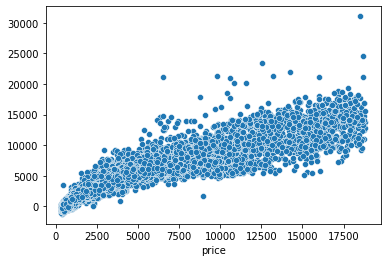

In [60]:
'''We will never look at the data like this, 
We need to look at the data AFTER he model
We got a "fat" line
'''
sb.scatterplot(y_test, y_pred)

**There's a serious business problem here. 
there are negative prices!
That's bad, and it seems like a linear model doesn't fit this**

In [ ]:
# Array of bools of negative
y_pred < 0
# the actual values
y_pred[y_pred < 0]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


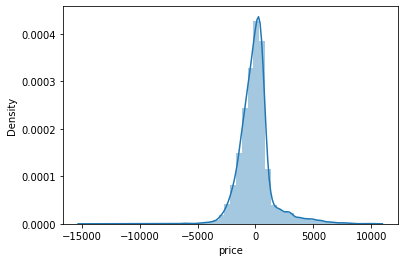

In [64]:
sb.distplot(y_test - y_pred)

In [66]:
# This was looking at the data, let's looks at this numerically
# That's a big error if we have 300 usd diamonds
import sklearn.metrics as mt
mt.mean_absolute_error(y_test, y_pred)

974.7138676980804

In [67]:
# We know we have outliers - let's look at something that is sensitive to outliers
# This means that our model gives results with an error of 1484 usd
# Not good.
mt.mean_squared_error(y_test, y_pred) ** 0.5

1484.9359737527386

# Next phase - bring back textual vars

In [68]:
df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [69]:
df.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['E', 'I', 'J', 'H', 'F', 'G', 'D']

In [70]:
df.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [71]:
# Make sure we have enough data for each one
# If for example, we had 10 Fair, then we would probably drop them
# What is the best here? we need business knowledge here
df.cut.value_counts()

Ideal        21547
Premium      13779
Very Good    12080
Good          4902
Fair          1609
Name: cut, dtype: int64

In [73]:
# If we can't learn from a business knowledge, let's see what's the relation between 
# cut and price
# By this, ideal is the lowest. does it make sense? 
df.groupby(['cut']).mean()

,carat,depth,table,price,vol
cut,,,,,
Ideal,0.702768,61.709496,55.951798,3457.005337,115.377419
Premium,0.891328,61.265179,58.746455,4579.130779,144.899724
Very Good,0.806390,61.818154,57.956829,3981.830629,130.951998
Good,0.848711,62.364545,58.693778,3926.403509,136.368452
Fair,1.046078,64.045743,59.048850,4357.500932,165.053067


In [74]:
# Let's try looking at both cut and color
df.groupby(['cut', 'color']).mean().sort_values(by='price', ascending=False)

carat      depth      table        price         vol
cut       color                                                         
Premium   J      1.293094  61.390099  58.874752  6294.591584  210.083456
          I      1.144163  61.328662  58.772390  5939.557814  185.891309
Very Good I      1.046952  61.934551  58.105150  5255.879568  169.652340
Premium   H      1.014087  61.324087  58.794053  5195.375531  164.589426
Fair      H      1.219175  64.585149  58.696370  5135.683168  191.287122
Very Good J      1.133215  61.902065  58.277729  5103.513274  183.539052
Good      I      1.057222  62.475096  58.773946  5078.532567  169.451956
Fair      J      1.341176  64.357143  58.917647  4975.655462  210.540875
Ideal     J      1.063594  61.821987  56.012612  4918.186384  173.951512
Fair      I      1.198057  64.220571  59.237143  4685.445714  188.664251
Good      J      1.099544  62.395765  58.813029  4574.172638  176.382144
Very Good H      0.915902  61.967636  57.905705  4535.059243  148.433456
Premium   G      0.841250  61.279938  58.702054  4502.207806  136.767542
Ideal     I      0.913029  61.793598  56.021357  4451.970377  149.462019
Premium   F      0.826957  61.260858  58.679571  4325.099571  134.457189
Fair      D      0.920123  64.048466  58.969325  4291.061350  145.606415
Good      H      0.914729  62.499573  58.611111  4276.254986  146.800605
Fair      G      1.023450  64.361661  58.746965  4232.412141  161.391466
Good      G      0.847906  62.523475  58.469620  4105.907940  136.189736
Ideal     H      0.799525  61.733194  55.965843  3889.334831  131.114846
Very Good G      0.766799  61.841279  57.784428  3872.753806  124.563879
Fair      F      0.904712  63.508013  59.453205  3827.003205  143.438736
Very Good F      0.740961  61.721627  57.848429  3778.820240  120.518432
Ideal     G      0.700447  61.700574  55.902745  3718.469070  115.087978
Fair      E      0.856607  63.319643  59.364732  3682.312500  136.328206
Premium   D      0.721248  61.168664  58.718789  3623.767790  117.400794
          E      0.717745  61.175909  58.779461  3538.914420  116.926036
Good      F      0.776075  62.198126  58.908490  3498.761852  124.826807
Very Good D      0.696424  61.750165  58.041309  3470.467284  113.294572
Good      E      0.745134  62.203751  58.779957  3423.644159  120.022834
          D      0.744517  62.365710  58.541541  3405.382175  119.747415
Ideal     F      0.655720  61.675582  55.924183  3374.526536  107.777501
Very Good E      0.676386  61.730221  58.040267  3215.170905  110.052572
Ideal     D      0.565766  61.678370  55.965632  2629.094566   93.056131
          E      0.578419  61.686648  55.967709  2597.684008   95.105179

In [75]:
# Adding clarity
df.groupby(['cut', 'color', 'clarity']).mean().sort_values(by='price', ascending=False)

carat      depth  ...         price         vol
cut       color clarity                       ...                          
Very Good D     IF       0.803043  61.513043  ...  10298.260870  131.397654
Good      D     IF       0.786667  60.877778  ...  10030.333333  128.567848
Ideal     J     I1       1.990000  63.500000  ...   9454.000000  312.663015
Premium   D     IF       0.708000  61.070000  ...   9056.500000  116.510848
          J     SI2      1.554534  61.280745  ...   7550.285714  251.988642
...                           ...        ...  ...           ...         ...
Very Good J     IF       0.455000  61.387500  ...   1074.125000   74.673309
Fair      E     IF            NaN        NaN  ...           NaN         NaN
          H     IF            NaN        NaN  ...           NaN         NaN
          I     IF            NaN        NaN  ...           NaN         NaN
          J     IF            NaN        NaN  ...           NaN         NaN

[280 rows x 5 columns]

This is just our data, it doesn't mean that this is really the most influence on the price

We will simply start replacing them

In [82]:
# Let's test now with, replacing the 
df = sb.load_dataset('diamonds')
df.drop(df.query('x == 0 or y == 0 or z == 0').index, inplace=True)
df.drop(df.query('y > 20 or z > 20').index, inplace=True)
df['vol'] = df.x * df.y * df.z
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [ ]:
# Replace cut with numeric values, let's say by some business know-how
df.cut.replace({'Ideal': 4, 'Premium': 5, 'Good': 2, 'Very Good': 3, 'Fair': 1}, inplace=True)
# Replace color with numeric values, let's say by some business know-how
df.color.replace({'E': 2, 'I': 6, 'J': 7, 'H': 5, 'F': 3, 'G': 4, 'D': 1}, inplace=True)
# Replace clarity with numeric values, let's say by some business know-how
df.clarity.replace({'SI2': 2, 'SI1': 1, 'VS1': 3, 'VS2': 4, 'VVS2': 6, 'VVS1': 5, 'I1': 7, 'IF': 8}, inplace=True)
df.head()

# Testing the model again

In [106]:
from sklearn.model_selection import train_test_split
# Prepare the train, test with train_test_split, see in function docstring
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(len(X_train))
print(len(X_test))

36124
17793


In [88]:
# Let's start with a linear model - is there a linear dependency between the price and the other vars
# If we look at the pair plots, we can see that there are no linear graphs
# So we probably should expect it NOT to be lineat. 
# Let's see

import sklearn.linear_model as sl
model = sl.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# Test the results with score:
model.score(X_test, y_test)

0.8584375635712067

In [90]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


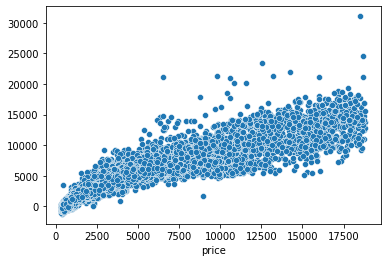

In [91]:
'''We will never look at the data like this, 
We need to look at the data AFTER he model
We got a "fat" line
'''
sb.scatterplot(y_test, y_pred)

In [ ]:
# Array of bools of negative
y_pred < 0
# the actual values
y_pred[y_pred < 0]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


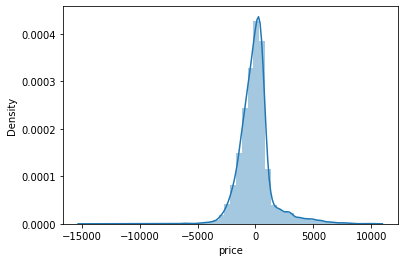

In [93]:
sb.distplot(y_test - y_pred)

In [94]:
# This was looking at the data, let's looks at this numerically
# That's a big error if we have 300 usd diamonds
import sklearn.metrics as mt
mt.mean_absolute_error(y_test, y_pred)

974.7138676980804

In [98]:
# We know we have outliers - let's look at something that is sensitive to outliers
# This means that our model gives results with an error of 1484 usd
# Not good.
mt.mean_squared_error(y_test, y_pred) ** 0.5

1484.9359737527386

In [97]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,4,2,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,5,2,1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,2,3,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,5,6,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


# Dummy variables
When we need to deal with textual, or more accurately, categorial variales, then there might not be a simple math operation for each value in the category. 
Since we don't really know the effect of each category, we turn it into a 0/1 for each category value. 

... COMPLETE FROM LECTURE

In [141]:
df = sb.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Let pandas create dummy vars for cut
pd.get_dummies(df.cut)

In [143]:
# This replace ALL textual vars with dummy vars
df = pd.get_dummies(df) 

In [144]:
df.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [131]:
# We now have 27 columns, and the model will learn what meaning of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Ideal      53940 non-null  uint8  
 8   cut_Premium    53940 non-null  uint8  
 9   cut_Very Good  53940 non-null  uint8  
 10  cut_Good       53940 non-null  uint8  
 11  cut_Fair       53940 non-null  uint8  
 12  color_D        53940 non-null  uint8  
 13  color_E        53940 non-null  uint8  
 14  color_F        53940 non-null  uint8  
 15  color_G        53940 non-null  uint8  
 16  color_H        53940 non-null  uint8  
 17  color_I        53940 non-null  uint8  
 18  color_

Now perform again all the operations
Now we get a better fit
We still have prices under zero
scores imporved 

But the problem is not linear, so we can't solve it with the LinearRegression model

In [150]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df.price

# Prepare the train, test with train_test_split, see in function docstring
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(len(X_train))
print(len(X_test))

36139
17801


In [151]:
# Let's start with a linear model - is there a linear dependency between the price and the other vars
# If we look at the pair plots, we can see that there are no linear graphs
# So we probably should expect it NOT to be lineat. 
# Let's see

import sklearn.linear_model as sl
model = sl.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
# Test the results with score:
model.score(X_test, y_test)

0.9201575632035259

In [154]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


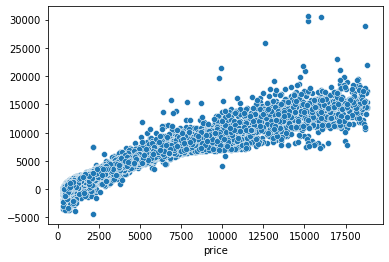

In [155]:
'''We will never look at the data like this, 
We need to look at the data AFTER he model
We got a "fat" line
'''
sb.scatterplot(y_test, y_pred)

In [156]:
# Array of bools of negative
y_pred < 0
# the actual values
y_pred[y_pred < 0]

array([ -125.09601662,  -213.80018717, -1194.85479085, ...,
        -419.66245984,   -44.59201656, -1150.96499264])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


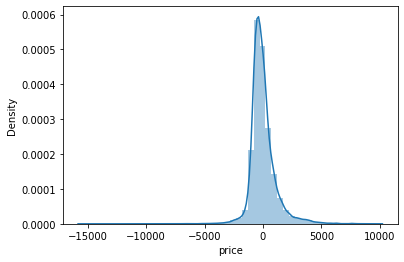

In [157]:
sb.distplot(y_test - y_pred)

In [158]:
# This was looking at the data, let's looks at this numerically
# That's a big error if we have 300 usd diamonds
import sklearn.metrics as mt
mt.mean_absolute_error(y_test, y_pred)

733.6995524536054

In [159]:
# We know we have outliers - let's look at something that is sensitive to outliers
# This means that our model gives results with an error of 1484 usd
# Not good.
mt.mean_squared_error(y_test, y_pred) ** 0.5

1116.4958781050682